In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from scipy.stats import skew
import math
import statsmodels.api as sm

In [4]:
google = yf.download('GOOGL-USD', start='2020-12-08', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [5]:
apple = yf.download('AAPL-USD', start='2020-12-08', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [6]:
amazon = yf.download('AMZN-USD', start='2020-12-08', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [7]:
nvidia = yf.download('NVDA-USD', start='2020-12-08', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [8]:
btc = yf.download('BTC-USD', start='2020-12-08', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [9]:
nasdaq = yf.download('^IXIC', start='2020-12-08', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [10]:
bist100 = yf.download('^XU100', start='2020-12-08', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [11]:
akbank = yf.download('AKBNK.IS', start='2020-12-08', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [12]:
tupras = yf.download('TUPRS.IS', start='2020-12-08', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [13]:
def linear_returns(data):
    price = data['Close']
    price_series = pd.Series(price)
    linear_returns = (price_series.pct_change() * 100).dropna()
    
    return(linear_returns)


google_linear_returns = linear_returns(google)
apple_linear_returns = linear_returns(apple)
amazon_linear_returns = linear_returns(amazon)
nvidia_linear_returns = linear_returns(nvidia)
btc_linear_returns = linear_returns(btc)
nasdaq_linear_returns = linear_returns(nasdaq)
bist100_linear_returns = linear_returns(bist100)
akbank_linear_returns = linear_returns(akbank)
tupras_linear_returns = linear_returns(tupras)


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
def descriptive_stats(data):
    frequencies = ['D', 'W', 'M', 'Y']
    stats_dict = {}

    for i in frequencies:
        resampled = data.resample(i).last()
        stats_dict[f'Count_{i}'] = len(resampled)
        stats_dict[f'Mean_{i}'] = resampled.mean()
        stats_dict[f'Std_{i}'] = resampled.std()
        stats_dict[f'Var_{i}'] = resampled.var()
        stats_dict[f'Min_{i}'] = resampled.min()
        stats_dict[f'Max_{i}'] = resampled.max()
        stats_dict[f'Skewness_{i}'] = skew(resampled.dropna())

    
    return pd.DataFrame(stats_dict, index=[data.name])


google_linear_returns.name = 'GOOGL'
apple_linear_returns.name = 'AAPL'
amazon_linear_returns.name = 'AMZN'
nvidia_linear_returns.name = 'NVDA'
btc_linear_returns.name = 'BTC'
nasdaq_linear_returns.name = 'NASDAQ'
bist100_linear_returns.name = 'XU100'
akbank_linear_returns.name = 'AKBNK'
tupras_linear_returns.name = 'TUPRS'


stock_data = {
    'GOOGL': descriptive_stats(google_linear_returns),
    'AAPL': descriptive_stats(apple_linear_returns),
    'AMZN': descriptive_stats(amazon_linear_returns),
    'NVDA': descriptive_stats(nvidia_linear_returns),
    'BTC': descriptive_stats(btc_linear_returns),
    'NASDAQ': descriptive_stats(nasdaq_linear_returns),
    'XU100': descriptive_stats(bist100_linear_returns),
    'AKBNK': descriptive_stats(akbank_linear_returns),
    'TUPRS': descriptive_stats(tupras_linear_returns),
}

df = pd.concat(stock_data.values())

df


,Count_D,Mean_D,Std_D,Var_D,Min_D,Max_D,Skewness_D,Count_W,Mean_W,Std_W,Var_W,Min_W,Max_W,Skewness_W,Count_M,Mean_M,Std_M,Var_M,Min_M,Max_M,Skewness_M,Count_Y,Mean_Y,Std_Y,Var_Y,Min_Y,Max_Y,Skewness_Y
GOOGL,388,0.13,1.31,1.72,-5.37,6.83,0.48,56,-0.07,0.45,0.20,-1.96,0.88,-1.01,13,-0.38,0.96,0.92,-1.96,1.38,-0.24,2,-0.79,1.66,2.75,-1.96,0.38,0.00
AAPL,388,0.10,1.38,1.90,-4.75,5.28,0.07,56,-0.06,0.51,0.26,-1.90,1.44,-0.13,13,-0.08,1.46,2.13,-1.90,3.42,1.22,2,-1.57,0.48,0.23,-1.90,-1.23,0.00
AMZN,388,0.02,1.39,1.94,-6.91,6.39,-0.16,56,-0.02,0.42,0.17,-1.53,0.85,-0.73,13,-0.23,1.17,1.36,-2.16,1.73,0.07,2,-1.44,0.12,0.02,-1.53,-1.36,0.00
NVDA,388,0.04,4.48,20.09,-75.41,11.28,-12.23,56,0.08,0.50,0.25,-1.40,1.52,0.01,13,-0.17,1.52,2.30,-1.99,3.91,1.41,2,-1.30,0.14,0.02,-1.40,-1.20,0.00
BTC,388,0.33,4.18,17.45,-13.77,18.75,0.09,56,0.27,3.00,8.99,-7.37,9.97,0.25,13,0.39,3.42,11.67,-3.37,7.83,1.08,2,-0.65,1.70,2.89,-1.85,0.56,0.00
NASDAQ,388,0.09,1.11,1.24,-3.52,3.69,-0.32,56,0.18,0.93,0.87,-2.23,2.32,-0.37,13,-0.29,0.91,0.83,-2.00,1.54,-0.03,2,-0.24,0.53,0.29,-0.61,0.14,0.00
XU100,296,0.04,1.40,1.95,-9.79,3.81,-2.24,43,-0.16,1.13,1.28,-4.24,2.51,-0.96,10,-0.74,1.46,2.13,-4.24,0.95,-1.36,2,-2.23,2.85,8.10,-4.24,-0.22,-0.00
AKBNK,388,0.09,2.16,4.68,-9.98,9.94,-0.68,56,-0.66,1.88,3.52,-9.98,3.00,-2.09,13,0.00,1.57,2.46,-2.00,2.79,0.19,2,-0.23,2.37,5.63,-1.91,1.45,0.00
TUPRS,388,0.21,2.38,5.69,-9.99,9.02,-0.58,56,0.03,2.57,6.58,-9.55,8.19,-0.17,13,-0.38,1.51,2.28,-3.02,2.11,-0.03,2,0.87,0.44,0.20,0.56,1.18,0.00


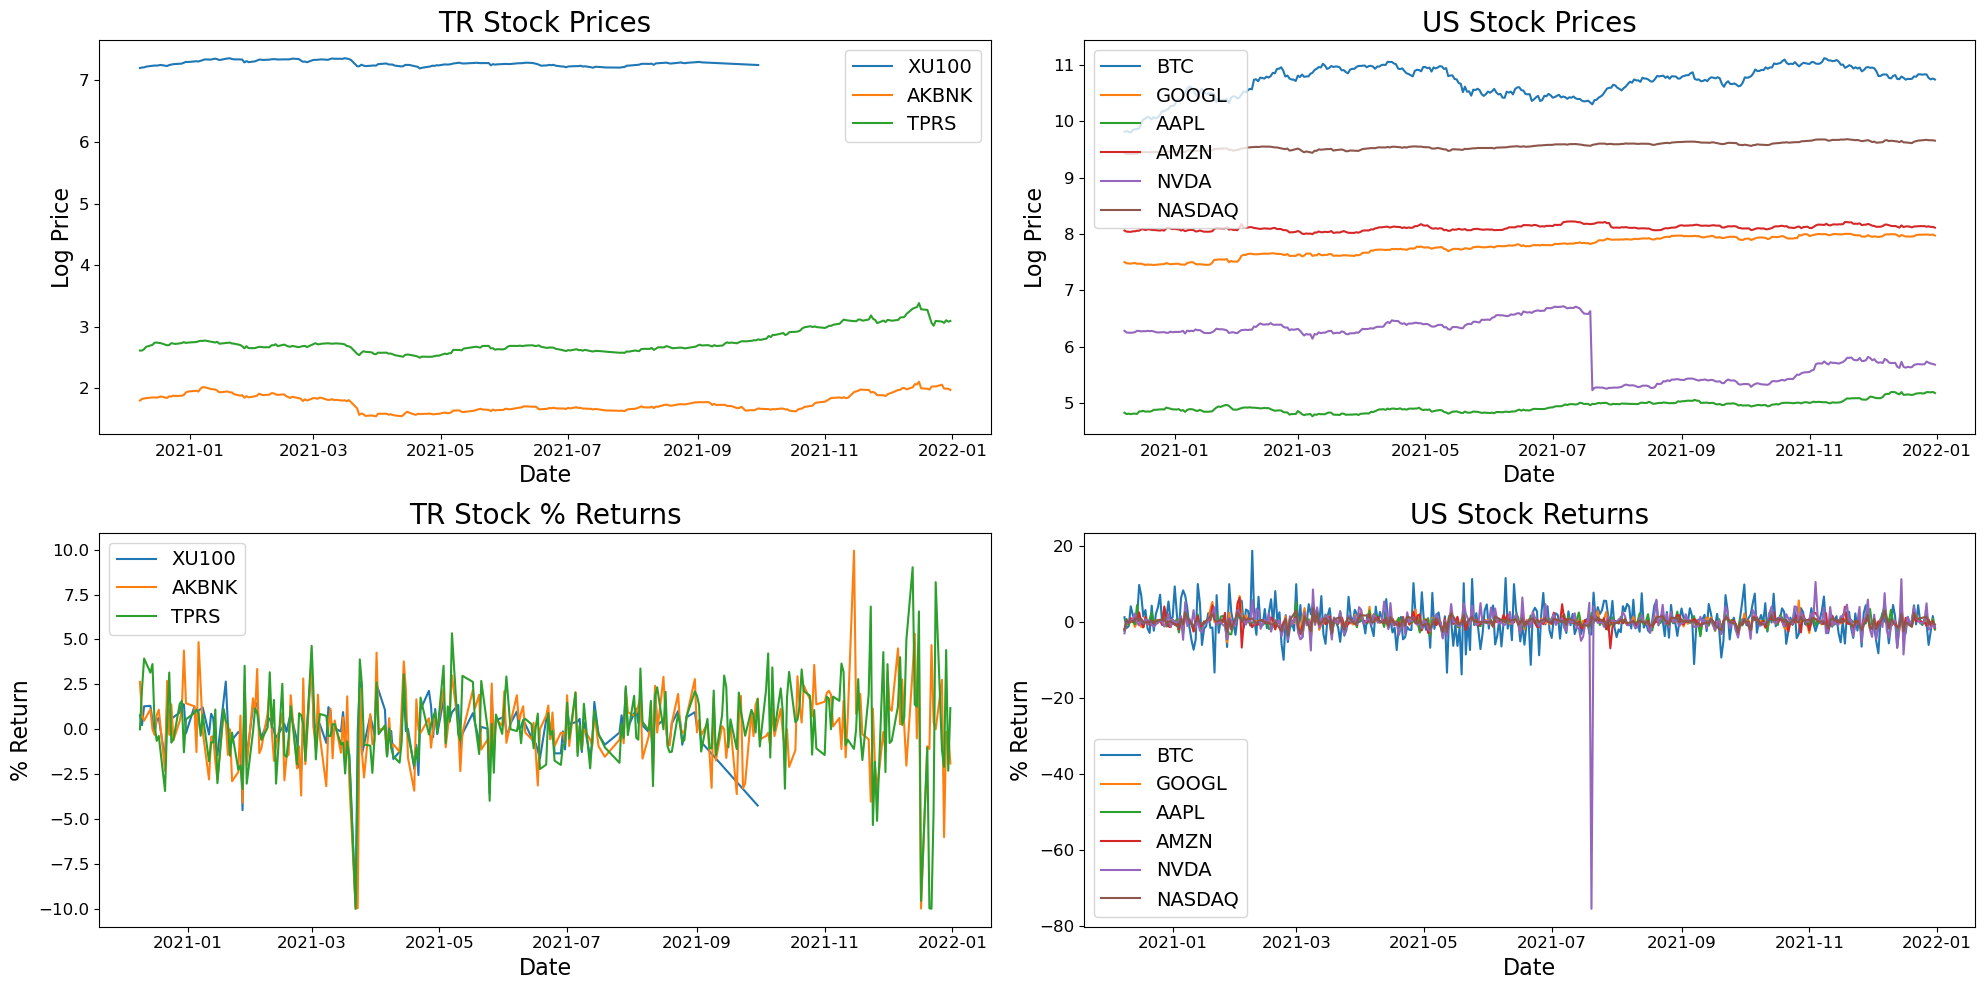

In [15]:
fig, axs = plot.subplots(2, 2, figsize=(20, 10))

axs[0,0].set_title('TR Stock Prices', fontsize=20) 
axs[0,0].set_xlabel('Date', fontsize=16)
axs[0,0].set_ylabel('Log Price', fontsize=16) 
axs[0,0].tick_params(labelsize=12)
axs[0,0].plot(np.log(bist100['Close']), label='XU100') 
axs[0,0].plot(np.log(akbank['Close']), label='AKBNK') 
axs[0,0].plot(np.log(tupras['Close']), label='TPRS') 
axs[0,0].legend(fontsize=14)

axs[0,1].set_title('US Stock Prices', fontsize=20) 
axs[0,1].set_xlabel('Date', fontsize=16)
axs[0,1].set_ylabel('Log Price', fontsize=16) 
axs[0,1].tick_params(labelsize=12)
axs[0,1].plot(np.log(btc['Close']), label='BTC')
axs[0,1].plot(np.log(google['Close']), label='GOOGL')
axs[0,1].plot(np.log(apple['Close']), label='AAPL') 
axs[0,1].plot(np.log(amazon['Close']), label='AMZN') 
axs[0,1].plot(np.log(nvidia['Close']), label='NVDA')
axs[0,1].plot(np.log(nasdaq['Close']), label='NASDAQ')
axs[0,1].legend(fontsize=14)

axs[1,0].set_title('TR Stock % Returns', fontsize=20) 
axs[1,0].set_xlabel('Date', fontsize=16)
axs[1,0].set_ylabel('% Return', fontsize=16) 
axs[1,0].tick_params(labelsize=12)
axs[1,0].plot((bist100_linear_returns), label='XU100') 
axs[1,0].plot((akbank_linear_returns), label='AKBNK') 
axs[1,0].plot((tupras_linear_returns), label='TPRS') 
axs[1,0].legend(fontsize=14)

axs[1,1].set_title('US Stock Returns', fontsize=20) 
axs[1,1].set_xlabel('Date', fontsize=16)
axs[1,1].set_ylabel('% Return', fontsize=16) 
axs[1,1].tick_params(labelsize=12)
axs[1,1].plot(btc_linear_returns, label='BTC')  # Using btc_linear_returns
axs[1,1].plot(google_linear_returns, label='GOOGL')  # Using google_linear_returns
axs[1,1].plot(apple_linear_returns, label='AAPL')  # Using apple_linear_returns
axs[1,1].plot(amazon_linear_returns, label='AMZN')  # Using amazon_linear_returns
axs[1,1].plot(nvidia_linear_returns, label='NVDA')  # Using nvidia_linear_returns
axs[1,1].plot(nasdaq_linear_returns, label='NASDAQ')
axs[1,1].legend(fontsize=14)

plot.tight_layout()
plot.show() 

In [16]:
plot.figure(figsize=(16, 8))

us_stocks = [google_linear_returns, apple_linear_returns, amazon_linear_returns, nvidia_linear_returns, nasdaq_linear_returns]
us_stock_labels = ['GOOGL', 'AAPL', 'AMZN', 'NVDA', 'NASDAQ'

for i, stock in enumerate(us_stocks, start=1):
    plot.subplot(2, 3, i)
    plot.hist(stock, bins=30, color='blue')
    plot.title(f'{us_stock_labels[i-1]} Daily Return')
    plot.xlabel('Daily Return %')
    plot.ylabel('Frequency')

plot.subplot(2, 3, 6)
plot.hist(btc_linear_returns, bins=30, color='yellow')
plot.title('BTC Daily Return Histogram')
plot.xlabel('Daily Return %')
plot.ylabel('Frequency')

plot.tight_layout()
plot.show()

avg_us_stocks = sum(us_stocks) / len(us_stocks)

plot.figure(figsize=(8, 4))
plot.hist(avg_us_stocks, bins=30, color='green')
plot.title('Average Daily Return of US Stocks')
plot.xlabel('Daily Return %')
plot.ylabel('Frequency')
plot.tight_layout()
plot.show()

SyntaxError: '[' was never closed (1726437508.py, line 4)

In [ ]:
data_dict = {
    'BTC': btc_linear_returns,
    'AAPL': apple_linear_returns,
    'GOOGL': google_linear_returns,
    'AMZN': amazon_linear_returns,
    'NVDA': nvidia_linear_returns,
    'NASDAQ': nasdaq_linear_returns,
    'AVG-US': avg_us_stocks,
}
correlation = pd.concat(data_dict, axis=1).corr()
btc_correlation = correlation['BTC']

In [ ]:
btc_correlation

In [ ]:
def sharpe_ratio(returns):
    mean_return = returns.mean()
    risk = returns.std()
    sharpe = mean_return / risk
    return sharpe

tr_stocks = [akbank_linear_returns, bist100_linear_returns, tupras_linear_returns]
us_stock_labels = ['GOOGL', 'AAPL', 'AMZN', 'NVDA', 'NASDAQ']
tr_stock_labels = ['AKBNK', 'TPRS', 'XU100']

sharpe_us_daily = [sharpe_ratio(i) for i in us_stocks]
sharpe_us_weekly = [sharpe_ratio(i.resample('W').last()) for i in us_stocks]
sharpe_us_monthly = [sharpe_ratio(i.resample('M').last()) for i in us_stocks]

sharpe_df_us = pd.DataFrame({
    'Stock': us_stock_labels,
    'Sharpe Ratio (Daily)': sharpe_us_daily,
    'Sharpe Ratio (Weekly)': sharpe_us_weekly,
    'Sharpe Ratio (Monthly)': sharpe_us_monthly
})

sharpe_tr_daily = [sharpe_ratio(i) for i in tr_stocks]
sharpe_tr_weekly = [sharpe_ratio(i.resample('W').last()) for i in tr_stocks]
sharpe_tr_monthly = [sharpe_ratio(i.resample('M').last()) for i in tr_stocks]

sharpe_df_tr = pd.DataFrame({
    'Stock': tr_stock_labels,
    'Sharpe Ratio (Daily)': sharpe_tr_daily,
    'Sharpe Ratio (Weekly)': sharpe_tr_weekly,
    'Sharpe Ratio (Monthly)': sharpe_tr_monthly
})

sharpe_btc_daily = sharpe_ratio(btc_linear_returns)
sharpe_btc_weekly = sharpe_ratio(btc_linear_returns.resample('W').last())
sharpe_btc_monthly = sharpe_ratio(btc_linear_returns.resample('M').last())


sharpe_df_btc = pd.DataFrame({
    'Stock': ['BTC'],
    'Sharpe Ratio (Daily)': [sharpe_btc_daily],
    'Sharpe Ratio (Weekly)': [sharpe_btc_weekly],
    'Sharpe Ratio (Monthly)': [sharpe_btc_monthly]
})

sharpe_combined = pd.concat([sharpe_df_btc, sharpe_df_tr, sharpe_df_us], axis=0)
sharpe_combined

In [ ]:
def estimate_beta(stock_returns,market_returns):
    X=sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X)
    results = model.fit()
    beta = results.params
    t_statistic = results.tvalues
    p_value = results.pvalues
    r_squared = results.rsquared
    return beta, t_statistic, p_value, r_squared

us_stocks_returns = pd.concat([apple_linear_returns.resample('M').last(), 
                              google_linear_returns.resample('M').last(),
                             nvidia_linear_returns.resample('M').last(),
                             amazon_linear_returns.resample('M').last()],
                            axis=1)
us_stocks_returns.columns = ['AAPL', 'GOOGL', 'NVDA', 'AMZN']
nasdaq_returns = nasdaq_linear_returns.resample('M').last()

tr_stocks_returns = pd.concat([akbank_linear_returns.resample('M').last(), 
                              tupras_linear_returns.resample('M').last()],
                            axis=1)
tr_stocks_returns.columns = ['AKBNK', 'TUPRS']
bist100_returns = bist100_linear_returns.resample('M').last()

us_betas= {}
for i in us_stocks_returns.columns:
    beta, t_statistic, p_value, r_squared = estimate_beta(us_stocks_returns[i], nasdaq_returns)
    us_betas[i] = {'Beta': beta, 'T-statistic': t_statistic, 'P-value': p_value, 'R-squared': r_squared}
    
common_months = bist100_returns.index.intersection(tr_stocks_returns.index)
bist100_common = bist100_returns.loc[common_months]
tr_stocks_common = tr_stocks_returns.loc[common_months]
    
tr_betas= {}
for i in tr_stocks_common.columns:
    beta, t_statistic, p_value, r_squared = estimate_beta(tr_stocks_common[i], bist100_common)
    tr_betas[i] = {'Beta': beta, 'T-statistic': t_statistic, 'P-value': p_value, 'R-squared': r_squared}


In [ ]:
tr_betas

In [ ]:
us_betas

In [ ]:
nvidia

In [ ]:
nasdaq